In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

warnings.filterwarnings('ignore')

In [ ]:
# !kaggle datasets download -d kmader/skin-cancer-mnist-ham10000
# !unzip skin-cancer-mnist-ham10000.zip

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: ham10000_images_part_2/ISIC_0029342.jpg  
  inflating: h

load data

In [23]:
# path='hmnist_28_28_RGB.csv'
path= r'hmnist_28_28_RGB/hmnist_28_28_RGB.csv'
df=pd.read_csv(path)
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Columns: 2353 entries, pixel0000 to label
dtypes: int64(2353)
memory usage: 179.8 MB


Shuffle the dataset

In [25]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,69,54,55,127,104,100,162,132,128,175,...,94,72,73,30,21,23,18,13,11,4
1,230,158,176,236,164,185,239,167,189,241,...,229,168,183,230,170,184,229,168,182,4
2,254,216,235,254,214,229,254,211,231,255,...,254,192,196,254,199,209,254,205,225,4
3,159,142,153,164,151,162,171,161,169,175,...,171,151,165,167,144,154,163,138,147,2
4,245,171,178,246,172,183,246,173,183,247,...,243,175,174,241,174,173,240,172,171,4


Split the dataset into training and testing sets

In [26]:
X = df.drop(['label'], axis=1)
y = df['label']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Shape X_train: {x_train.shape} and y_train: {y_train.shape}")
print(f"Shape X_test: {x_test.shape} and y_test: {y_test.shape}")

Shape X_train: (8012, 2352) and y_train: (8012,)
Shape X_test: (2003, 2352) and y_test: (2003,)


Normalize the pixel values

In [29]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Reshape the data

In [30]:
x_train = np.array(x_train).reshape(-1, 28, 28, 3)
x_test = np.array(x_test).reshape(-1, 28, 28, 3)

Convert labels to categorical format

In [31]:
df.label.unique()

array([4, 2, 1, 6, 0, 5, 3], dtype=int64)

In [32]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=7)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=7)

Visualize some images from the training set

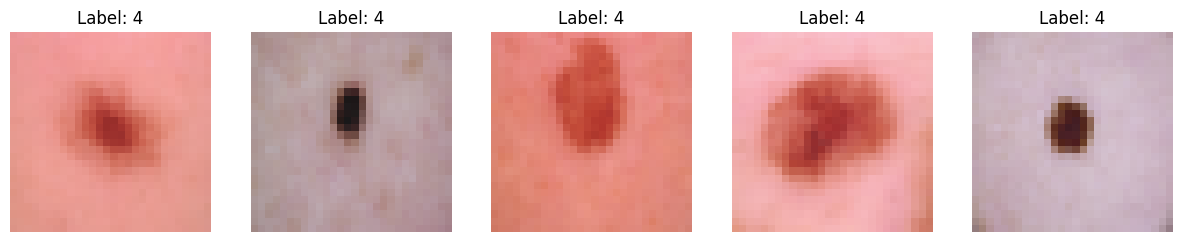

In [33]:
num_images = 5
fig, axes = plt.subplots(1, num_images, figsize=(15, 15))
for i in range(num_images):
    axes[i].imshow(x_train[i])
    axes[i].set_title(f"Label: {np.argmax(y_train[i])}")
    axes[i].axis('off')
plt.show()

Data augmentation

In [34]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)


# Build Model

In [35]:
model = Sequential([
    Conv2D(64, kernel_size=(3,3), input_shape=(28, 28, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2)),
    BatchNormalization(),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2)),
    BatchNormalization(),
    Dropout(0.25),

    Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2)),
    BatchNormalization(),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(7, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_4 (Bat  (None, 14, 14, 64)        256       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 128)        

# Model Training

In [37]:
callback_checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
callback_early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
callback_lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=0.00001)

history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    validation_data=(x_test, y_test),
                    epochs=50,
                    callbacks=[callback_early_stopping, callback_checkpoint, callback_lr_reduction])
history.history

Epoch 1/50
126/126 [==============================] - ETA: 0s - loss: 1.7784 - accuracy: 0.4769
Epoch 1: val_accuracy improved from -inf to 0.04593, saving model to best_model.h5
126/126 [==============================] - 24s 176ms/step - loss: 1.7784 - accuracy: 0.4769 - val_loss: 2.5900 - val_accuracy: 0.0459 - lr: 0.0010
Epoch 2/50
126/126 [==============================] - ETA: 0s - loss: 1.0952 - accuracy: 0.6367
Epoch 2: val_accuracy improved from 0.04593 to 0.10684, saving model to best_model.h5
126/126 [==============================] - 21s 164ms/step - loss: 1.0952 - accuracy: 0.6367 - val_loss: 3.1550 - val_accuracy: 0.1068 - lr: 0.0010
Epoch 3/50
126/126 [==============================] - ETA: 0s - loss: 0.9390 - accuracy: 0.6747
Epoch 3: val_accuracy improved from 0.10684 to 0.16425, saving model to best_model.h5
126/126 [==============================] - 23s 181ms/step - loss: 0.9390 - accuracy: 0.6747 - val_loss: 1.6880 - val_accuracy: 0.1643 - lr: 0.0010
Epoch 4/50
126/1

{'loss': [1.7784485816955566,
  1.095157265663147,
  0.9390479326248169,
  0.8705573081970215,
  0.7981514930725098,
  0.7745976448059082,
  0.7503518462181091,
  0.7324804067611694,
  0.7233145833015442,
  0.7114066481590271,
  0.70952969789505,
  0.6896713376045227,
  0.6808022260665894,
  0.6617134809494019,
  0.6475527286529541,
  0.6501785516738892,
  0.6436651945114136,
  0.6408726572990417,
  0.6422663927078247,
  0.637448787689209,
  0.6198766231536865,
  0.6144365072250366,
  0.6165635585784912,
  0.6010856628417969,
  0.6086999177932739,
  0.6054689884185791,
  0.603720486164093,
  0.5940512418746948,
  0.5905753970146179,
  0.584419310092926,
  0.5795164704322815,
  0.5931452512741089,
  0.579289972782135,
  0.5780831575393677,
  0.5768256187438965,
  0.575692892074585,
  0.5739516019821167,
  0.5695541501045227,
  0.5668424963951111,
  0.5597063302993774,
  0.5582877397537231,
  0.5560883283615112],
 'accuracy': [0.4769096374511719,
  0.6366699934005737,
  0.674737870693206

Model Evaluation

In [38]:
model.load_weights('best_model.h5')
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Loss: {loss}, Accuracy: {acc}")

63/63 - 1s - loss: 0.6104 - accuracy: 0.7793 - 1s/epoch - 21ms/step
Loss: 0.6103577613830566, Accuracy: 0.7793310284614563


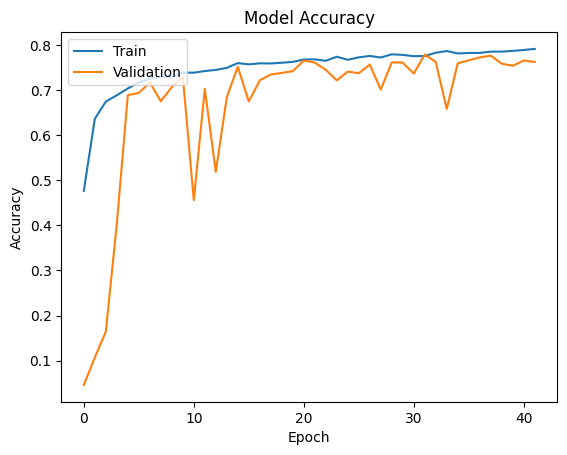

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

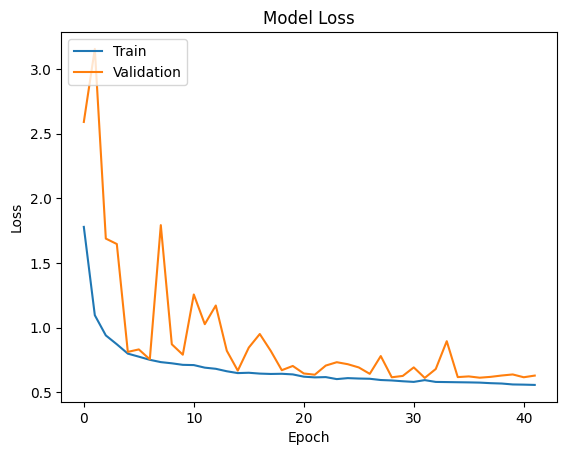

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [42]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
cm

63/63 [==============================] - 2s 21ms/step


array([[  27,   15,   11,    0,    8,    0,    8],
       [   7,   51,    4,    1,   21,    3,    5],
       [  10,   12,   79,    0,   76,    0,   36],
       [   1,    7,    1,    6,   10,    0,    1],
       [   3,    6,   19,    4, 1249,    1,   52],
       [   0,    1,    0,    0,    6,   21,    0],
       [   5,    3,   10,    0,   95,    0,  128]], dtype=int64)

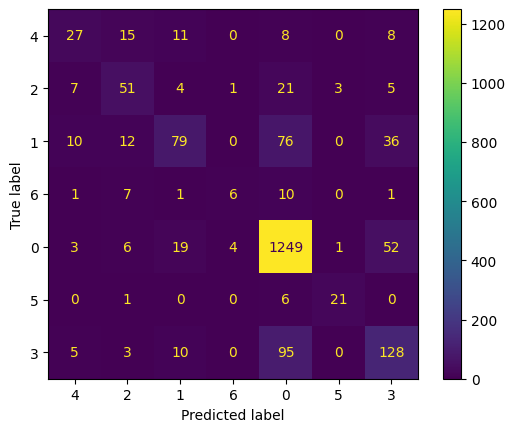

In [43]:
cmd = ConfusionMatrixDisplay(cm, display_labels=df.label.unique())
cmd.plot()

In [44]:
final_training_accuracy = history.history['accuracy'][-1]
final_validation_accuracy = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_training_accuracy * 100:.2f}%")
print(f"Final Validation Accuracy: {final_validation_accuracy * 100:.2f}%")

Final Training Accuracy: 79.17%
Final Validation Accuracy: 76.29%


Finally save model

In [41]:
model.save('best_model.h5')

Model Testing

Finally you can replace numbers of output with names

In [45]:
# # reference: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000/discussion/183083
# classes={
#     0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),

#     1:('bcc' , 'basal cell carcinoma'),

#     2:('bkl', 'benign keratosis-like lesions'),

#     3:('df', 'dermatofibroma'),

#     4:('nv', ' melanocytic nevi'),

#     5:('vasc', ' pyogenic granulomas and hemorrhage'),

#     6:('mel', 'melanoma'),
# }